In [1]:
'''
Forecast the CocaCola prices data set. Prepare a document for each model explaining 
how many dummy variables you have created and RMSE value for each model. Finally which model you will use for 
Forecasting.

'''

'\nForecast the CocaCola prices data set. Prepare a document for each model explaining \nhow many dummy variables you have created and RMSE value for each model. Finally which model you will use for \nForecasting.\n\n'

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf
from pylab import rcParams
from math import sqrt
from sklearn.metrics import mean_squared_error, mean_absolute_error
import statsmodels.formula.api as smf
from scipy import stats

import warnings
warnings.filterwarnings('ignore')

In [3]:
#ls

In [4]:
data=pd.read_excel("CocaCola_Sales_Rawdata.xlsx")
data.head()

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996


In [5]:
data.shape

(42, 2)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Quarter  42 non-null     object 
 1   Sales    42 non-null     float64
dtypes: float64(1), object(1)
memory usage: 800.0+ bytes


In [7]:
data.describe()

,Sales
count,42.000000
mean,2994.353308
std,977.930896
min,1547.818996
25%,2159.714247
50%,2782.376999
75%,3609.250000
max,5253.000000


In [8]:
#Missing values

data.isnull().sum()

Quarter    0
Sales      0
dtype: int64

In [9]:
data.nunique()

Quarter    42
Sales      42
dtype: int64

In [10]:
data[data.duplicated()]

,Quarter,Sales


In [11]:
data[data.duplicated()].shape

(0, 2)

In [12]:
data

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996
5,Q2_87,2104.411995
6,Q3_87,2014.362999
7,Q4_87,1991.746998
8,Q1_88,1869.049999
9,Q2_88,2313.631996


In [13]:
#Converting the Quarters into Years

In [14]:
data['Quarter_Year'] = data['Quarter'].str.split('_').apply(lambda x: ' 19'.join(x[:]))

In [15]:
data.head()

,Quarter,Sales,Quarter_Year
0,Q1_86,1734.827000,Q1 1986
1,Q2_86,2244.960999,Q2 1986
2,Q3_86,2533.804993,Q3 1986
3,Q4_86,2154.962997,Q4 1986
4,Q1_87,1547.818996,Q1 1987


In [16]:
#Coverting Quarter Years with Quarter Start Date Year

data['Date'] = (
    pd.to_datetime(
        data['Quarter_Year'].str.split(' ').apply(lambda x: ''.join(x[::-1]))
,dayfirst=True))
data.head(10)

,Quarter,Sales,Quarter_Year,Date
0,Q1_86,1734.827000,Q1 1986,1986-01-01
1,Q2_86,2244.960999,Q2 1986,1986-04-01
2,Q3_86,2533.804993,Q3 1986,1986-07-01
3,Q4_86,2154.962997,Q4 1986,1986-10-01
4,Q1_87,1547.818996,Q1 1987,1987-01-01
5,Q2_87,2104.411995,Q2 1987,1987-04-01
6,Q3_87,2014.362999,Q3 1987,1987-07-01
7,Q4_87,1991.746998,Q4 1987,1987-10-01
8,Q1_88,1869.049999,Q1 1988,1988-01-01
9,Q2_88,2313.631996,Q2 1988,1988-04-01


In [17]:
data['Quarters'] = 0

for i in range(42):
    n = data['Quarter'][i]
    data['Quarters'][i] = n[0:2]
    
data.head(10)

,Quarter,Sales,Quarter_Year,Date,Quarters
0,Q1_86,1734.827000,Q1 1986,1986-01-01,Q1
1,Q2_86,2244.960999,Q2 1986,1986-04-01,Q2
2,Q3_86,2533.804993,Q3 1986,1986-07-01,Q3
3,Q4_86,2154.962997,Q4 1986,1986-10-01,Q4
4,Q1_87,1547.818996,Q1 1987,1987-01-01,Q1
5,Q2_87,2104.411995,Q2 1987,1987-04-01,Q2
6,Q3_87,2014.362999,Q3 1987,1987-07-01,Q3
7,Q4_87,1991.746998,Q4 1987,1987-10-01,Q4
8,Q1_88,1869.049999,Q1 1988,1988-01-01,Q1
9,Q2_88,2313.631996,Q2 1988,1988-04-01,Q2


In [18]:
#Creating Dummy Variables for Quarters

In [19]:
dummy= pd.DataFrame(pd.get_dummies(data['Quarters']))
data1= pd.concat((data, dummy), axis=1)
data1.head()

,Quarter,Sales,Quarter_Year,Date,Quarters,Q1,Q2,Q3,Q4
0,Q1_86,1734.827000,Q1 1986,1986-01-01,Q1,1,0,0,0
1,Q2_86,2244.960999,Q2 1986,1986-04-01,Q2,0,1,0,0
2,Q3_86,2533.804993,Q3 1986,1986-07-01,Q3,0,0,1,0
3,Q4_86,2154.962997,Q4 1986,1986-10-01,Q4,0,0,0,1
4,Q1_87,1547.818996,Q1 1987,1987-01-01,Q1,1,0,0,0


In [20]:
#Dropping unnecessary column
data1.drop(['Quarter','Quarter_Year'] , axis =1, inplace = True)
data1.head()

,Sales,Date,Quarters,Q1,Q2,Q3,Q4
0,1734.827000,1986-01-01,Q1,1,0,0,0
1,2244.960999,1986-04-01,Q2,0,1,0,0
2,2533.804993,1986-07-01,Q3,0,0,1,0
3,2154.962997,1986-10-01,Q4,0,0,0,1
4,1547.818996,1987-01-01,Q1,1,0,0,0


In [21]:
data1["Date"] = pd.to_datetime(data1.Date,format="%b-%y")
data1["month"] = data1.Date.dt.strftime("%b") # month extraction
data1["year"] = data1.Date.dt.strftime("%Y") # year extraction
data1.head(10)

,Sales,Date,Quarters,Q1,Q2,Q3,Q4,month,year
0,1734.827000,1986-01-01,Q1,1,0,0,0,Jan,1986
1,2244.960999,1986-04-01,Q2,0,1,0,0,Apr,1986
2,2533.804993,1986-07-01,Q3,0,0,1,0,Jul,1986
3,2154.962997,1986-10-01,Q4,0,0,0,1,Oct,1986
4,1547.818996,1987-01-01,Q1,1,0,0,0,Jan,1987
5,2104.411995,1987-04-01,Q2,0,1,0,0,Apr,1987
6,2014.362999,1987-07-01,Q3,0,0,1,0,Jul,1987
7,1991.746998,1987-10-01,Q4,0,0,0,1,Oct,1987
8,1869.049999,1988-01-01,Q1,1,0,0,0,Jan,1988
9,2313.631996,1988-04-01,Q2,0,1,0,0,Apr,1988


In [22]:
#Visuliazation

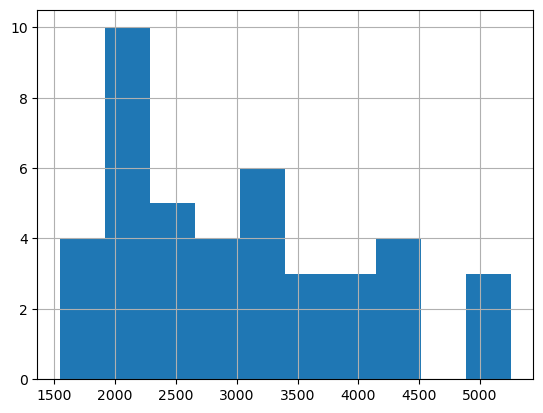

In [23]:
data1['Sales'].hist()
plt.show()

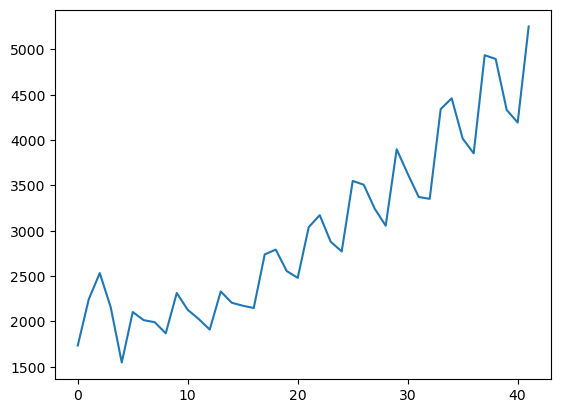

In [24]:
plt.plot(data1['Sales'])

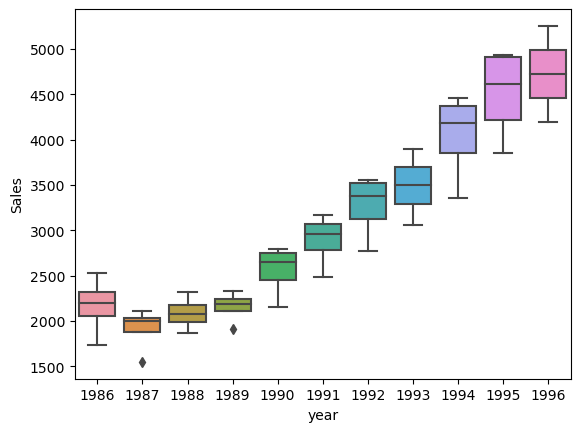

In [25]:
sns.boxplot(x ='year', y ='Sales',data=data1)
plt.show()

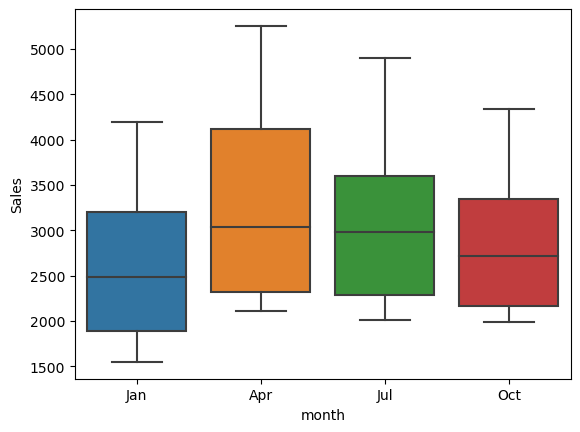

In [26]:
sns.boxplot(x ='month', y ='Sales',data=data1)
plt.show()

<Axes: xlabel='Quarters', ylabel='Sales'>

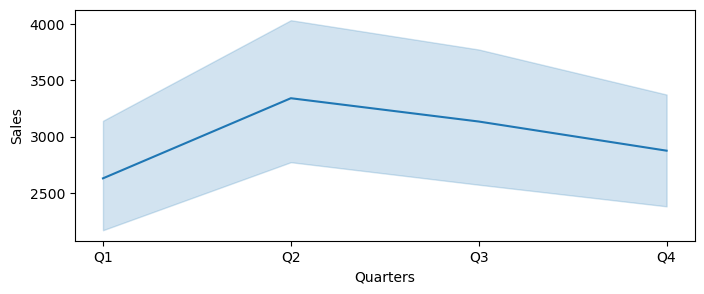

In [27]:
plt.figure(figsize=(8,3))
sns.lineplot(x="Quarters", y="Sales", data=data1)

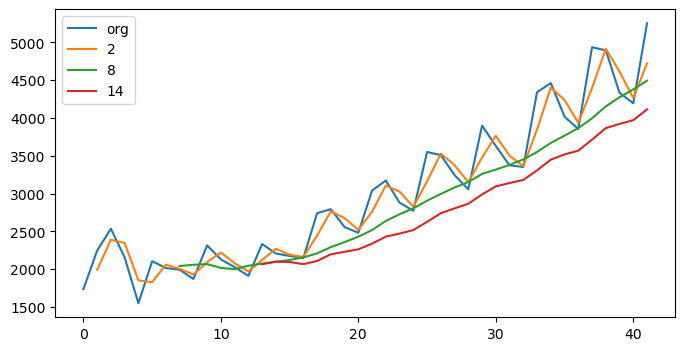

In [28]:
#Moving Average

plt.figure(figsize=(8,4))
data.Sales.plot(label="org")
for i in range(2,16,6):
    data["Sales"].rolling(i).mean().plot(label=str(i))
plt.legend(loc='best')

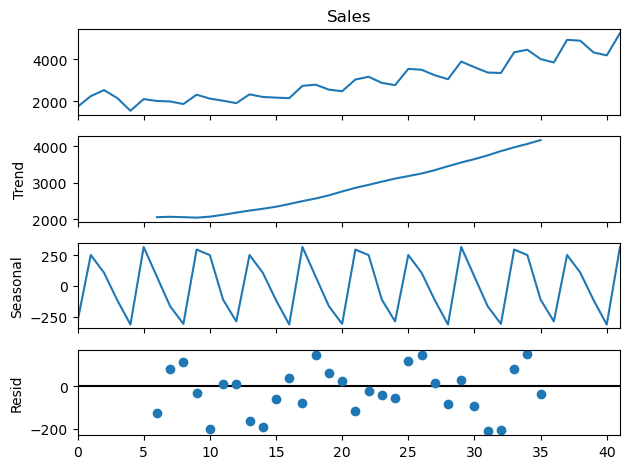

In [29]:
#Time series decomposition plot
from statsmodels.tsa.seasonal import seasonal_decompose

decompose_ts_add = seasonal_decompose(data.Sales,period=12)
decompose_ts_add.plot()
plt.show()

#### ACF plots and PACF plots

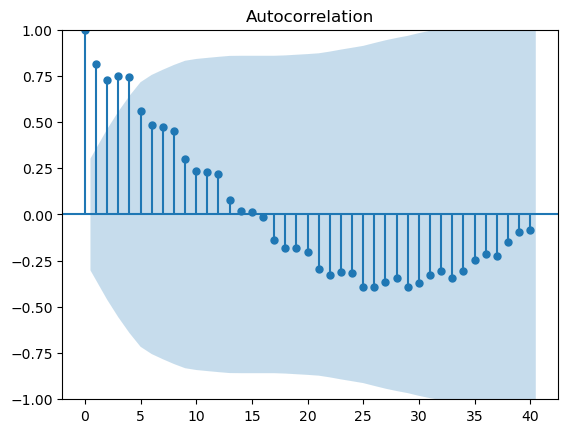

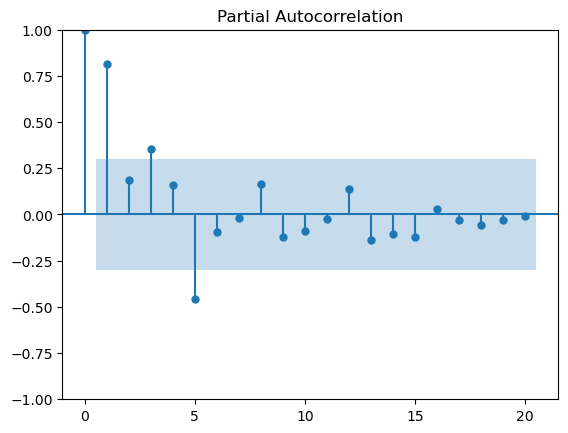

In [30]:
import statsmodels.graphics.tsaplots as tsa_plots

tsa_plots.plot_acf(data1.Sales,lags=40)
tsa_plots.plot_pacf(data1.Sales,lags=20)
plt.show()

In [31]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing # SES
from statsmodels.tsa.holtwinters import Holt # Holts Exponential Smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [32]:
# Data preprocessing for models
data1["t"] = np.arange(1,43)
data1["t_squared"] = data1["t"]*data1["t"]

data1["log_sales"] = np.log(data1["Sales"])

data1.head()

,Sales,Date,Quarters,Q1,Q2,Q3,Q4,month,year,t,t_squared,log_sales
0,1734.827000,1986-01-01,Q1,1,0,0,0,Jan,1986,1,1,7.458663
1,2244.960999,1986-04-01,Q2,0,1,0,0,Apr,1986,2,4,7.716443
2,2533.804993,1986-07-01,Q3,0,0,1,0,Jul,1986,3,9,7.837477
3,2154.962997,1986-10-01,Q4,0,0,0,1,Oct,1986,4,16,7.675529
4,1547.818996,1987-01-01,Q1,1,0,0,0,Jan,1987,5,25,7.344602


In [33]:
#Splitting Data

In [34]:
train=data1.head(30)
test=data1.tail(12)

In [35]:
train

,Sales,Date,Quarters,Q1,Q2,Q3,Q4,month,year,t,t_squared,log_sales
0,1734.827000,1986-01-01,Q1,1,0,0,0,Jan,1986,1,1,7.458663
1,2244.960999,1986-04-01,Q2,0,1,0,0,Apr,1986,2,4,7.716443
2,2533.804993,1986-07-01,Q3,0,0,1,0,Jul,1986,3,9,7.837477
3,2154.962997,1986-10-01,Q4,0,0,0,1,Oct,1986,4,16,7.675529
4,1547.818996,1987-01-01,Q1,1,0,0,0,Jan,1987,5,25,7.344602
5,2104.411995,1987-04-01,Q2,0,1,0,0,Apr,1987,6,36,7.651791
6,2014.362999,1987-07-01,Q3,0,0,1,0,Jul,1987,7,49,7.608058
7,1991.746998,1987-10-01,Q4,0,0,0,1,Oct,1987,8,64,7.596767
8,1869.049999,1988-01-01,Q1,1,0,0,0,Jan,1988,9,81,7.533186
9,2313.631996,1988-04-01,Q2,0,1,0,0,Apr,1988,10,100,7.746574


In [36]:
test

,Sales,Date,Quarters,Q1,Q2,Q3,Q4,month,year,t,t_squared,log_sales
30,3629.0,1993-07-01,Q3,0,0,1,0,Jul,1993,31,961,8.196712
31,3373.0,1993-10-01,Q4,0,0,0,1,Oct,1993,32,1024,8.123558
32,3352.0,1994-01-01,Q1,1,0,0,0,Jan,1994,33,1089,8.117312
33,4342.0,1994-04-01,Q2,0,1,0,0,Apr,1994,34,1156,8.376090
34,4461.0,1994-07-01,Q3,0,0,1,0,Jul,1994,35,1225,8.403128
35,4017.0,1994-10-01,Q4,0,0,0,1,Oct,1994,36,1296,8.298291
36,3854.0,1995-01-01,Q1,1,0,0,0,Jan,1995,37,1369,8.256867
37,4936.0,1995-04-01,Q2,0,1,0,0,Apr,1995,38,1444,8.504311
38,4895.0,1995-07-01,Q3,0,0,1,0,Jul,1995,39,1521,8.495970
39,4333.0,1995-10-01,Q4,0,0,0,1,Oct,1995,40,1600,8.374015


In [37]:
print('Train:',train.index.min(),train.index.max(),'\n',
'Test:',test.index.min(),test.index.max())

Train: 0 29 
 Test: 30 41


### Evaluation Metric RMSE

In [38]:
def RMSE(org, pred):
    rmse=np.sqrt(np.mean((np.array(org)-np.array(pred))**2))
    return rmse

#### Simple Exponential Method

In [39]:
from sklearn.metrics import mean_squared_error

In [40]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

ses_model = SimpleExpSmoothing(train["Sales"]).fit()
pred_ses = ses_model.predict(start = test.index[0],end=test.index[-1])
rmse_ses_model = RMSE(test.Sales, pred_ses)
rmse_ses_model

902.6040065357666

#### Holt method

In [41]:
from statsmodels.tsa.holtwinters import Holt

hw_model = Holt(train["Sales"]).fit()
pred_hw = hw_model.predict(start = test.index[0],end =test.index[-1])
rmse_hw_model = RMSE(test.Sales, pred_hw)
rmse_hw_model

437.19260356134913

#### Holts winter exponential smoothing with additive seasonality and additive trend

In [42]:
#Triple Exponential
from statsmodels.tsa.holtwinters import ExponentialSmoothing

hwe_model_add_add = ExponentialSmoothing(train["Sales"],seasonal="add",trend="add",seasonal_periods=4).fit()
pred_hwe_add_add = hwe_model_add_add.predict(start =test.index[0],end=test.index[-1])
rmse_hwe_add_add_model = RMSE(test.Sales, pred_hwe_add_add)
rmse_hwe_add_add_model


231.45776604117995

#### Holts winter exponential smoothing with multiplicative seasonality and additive trend

In [43]:
#Triple Exponential
hwe_model_mul_add = ExponentialSmoothing(train["Sales"],seasonal="mul",trend="add",seasonal_periods=4).fit() 
pred_hwe_mul_add = hwe_model_mul_add.predict(start = test.index[0],end=test.index[-1])
rmse_hwe_model_mul_add_model = RMSE(test.Sales, pred_hwe_mul_add)
rmse_hwe_model_mul_add_model

194.7006125543579

In [44]:
d= {'method':(['Simple Exponential','Holt method','Triple Exponential_add_add','Triple Exponential_mul_add']),
                     'rmse_value': ([rmse_ses_model,rmse_hw_model,rmse_hwe_add_add_model,rmse_hwe_model_mul_add_model])}
rmse_data = pd.DataFrame(d)
rmse_data.sort_values('rmse_value')

,method,rmse_value
3,Triple Exponential_mul_add,194.700613
2,Triple Exponential_add_add,231.457766
1,Holt method,437.192604
0,Simple Exponential,902.604007


Triple Exponential(smoothing with multiplicative seasonality and additive trend) as good rmse score

### Model

In [45]:
#Linear Model
import statsmodels.formula.api as smf 

linear_model = smf.ols('Sales~t',data=train).fit()
pred_linear =  pd.Series(linear_model.predict(pd.DataFrame(test['t'])))
rmse_linear_model = RMSE(test['Sales'], pred_linear)
rmse_linear_model

714.0144483281297

In [46]:
linear_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.708
Model:                            OLS   Adj. R-squared:                  0.697
Method:                 Least Squares   F-statistic:                     67.86
Date:                Sat, 12 Aug 2023   Prob (F-statistic):           5.77e-09
Time:                        19:09:54   Log-Likelihood:                -214.65
No. Observations:                  30   AIC:                             433.3
Df Residuals:                      28   BIC:                             436.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1640.3537    120.095     13.659      0.000    1394.350    1886.358
t             55.7274      6.765      8.238      0.000      41.870      69.584
==============================================================================
Omnibus:                        2.047   Durbin-Watson:                   1.303
Prob(Omnibus):                  0.359   Jarque-Bera (JB):                1.854
Skew:                           0.549   Prob(JB):                        0.396
Kurtosis:                       2.473   Cond. No.                         36.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [47]:
#Exponential

Exp = smf.ols('log_sales~t',data=train).fit()
pred_Exp = pd.Series(Exp.predict(pd.DataFrame(test['t'])))
rmse_Exp_model = RMSE(test['Sales'], np.exp(pred_Exp))
rmse_Exp_model

552.2821039079295

In [48]:
Exp.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_sales   R-squared:                       0.707
Model:                            OLS   Adj. R-squared:                  0.696
Method:                 Least Squares   F-statistic:                     67.47
Date:                Sat, 12 Aug 2023   Prob (F-statistic):           6.11e-09
Time:                        19:09:56   Log-Likelihood:                 20.823
No. Observations:                  30   AIC:                            -37.65
Df Residuals:                      28   BIC:                            -34.84
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.4645      0.047    159.325      0.000       7.369       7.560
t              0.0217      0.003      8.214      0.000       0.016       0.027
==============================================================================
Omnibus:                        0.963   Durbin-Watson:                   1.482
Prob(Omnibus):                  0.618   Jarque-Bera (JB):                0.706
Skew:                           0.366   Prob(JB):                        0.702
Kurtosis:                       2.832   Cond. No.                         36.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [49]:
#Quadratic 

Quad = smf.ols('Sales~t+t_squared',data=train).fit()
pred_Quad = pd.Series(Quad.predict(test[["t","t_squared"]]))
rmse_Quad_model = RMSE(test['Sales'], pred_Quad)
rmse_Quad_model

646.2715428311323

In [50]:
Quad.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.810
Model:                            OLS   Adj. R-squared:                  0.796
Method:                 Least Squares   F-statistic:                     57.42
Date:                Sat, 12 Aug 2023   Prob (F-statistic):           1.88e-10
Time:                        19:09:57   Log-Likelihood:                -208.23
No. Observations:                  30   AIC:                             422.5
Df Residuals:                      27   BIC:                             426.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2092.2906    154.596     13.534      0.000    1775.085    2409.496
t            -29.0108     22.989     -1.262      0.218     -76.180      18.158
t_squared      2.7335      0.720      3.799      0.001       1.257       4.210
==============================================================================
Omnibus:                        1.074   Durbin-Watson:                   1.977
Prob(Omnibus):                  0.585   Jarque-Bera (JB):                0.859
Skew:                          -0.083   Prob(JB):                        0.651
Kurtosis:                       2.188   Cond. No.                     1.36e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.36e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [51]:
#Additive seasonality 

add_sea = smf.ols('Sales~Q1+Q2+Q3',data=train).fit()
pred_add_sea = pd.Series(add_sea.predict(test[['Q1', 'Q2', 'Q3']]))
rmse_add_sea = RMSE(test['Sales'], pred_add_sea)
rmse_add_sea

1778.0065467941376

In [52]:
add_sea.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.154
Model:                            OLS   Adj. R-squared:                  0.057
Method:                 Least Squares   F-statistic:                     1.583
Date:                Sat, 12 Aug 2023   Prob (F-statistic):              0.218
Time:                        19:09:58   Log-Likelihood:                -230.59
No. Observations:                  30   AIC:                             469.2
Df Residuals:                      26   BIC:                             474.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2432.3397    214.029     11.365      0.000    1992.397    2872.282
Q1          -242.3957    293.071     -0.827      0.416    -844.812     360.021
Q2           345.4104    293.071      1.179      0.249    -257.006     947.827
Q3           189.9329    302.683      0.627      0.536    -432.240     812.106
==============================================================================
Omnibus:                        4.311   Durbin-Watson:                   0.105
Prob(Omnibus):                  0.116   Jarque-Bera (JB):                2.896
Skew:                           0.588   Prob(JB):                        0.235
Kurtosis:                       2.033   Cond. No.                         4.94
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [53]:
#Additive Seasonality Quadratic 

add_sea_Quad = smf.ols('Sales~t+t_squared+Q1+Q2+Q3',data=train).fit()
pred_add_sea_quad = pd.Series(add_sea_Quad.predict(test[['Q1','Q2','Q3','t','t_squared']]))
rmse_add_sea_Quad_model = RMSE(test['Sales'], pred_add_sea_quad)
rmse_add_sea_Quad_model

586.0533067870574

In [54]:
add_sea_Quad.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.953
Model:                            OLS   Adj. R-squared:                  0.944
Method:                 Least Squares   F-statistic:                     98.34
Date:                Sat, 12 Aug 2023   Prob (F-statistic):           3.50e-15
Time:                        19:09:59   Log-Likelihood:                -187.10
No. Observations:                  30   AIC:                             386.2
Df Residuals:                      24   BIC:                             394.6
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2050.5047     97.095     21.118      0.000    1850.110    2250.900
t            -33.0378     12.186     -2.711      0.012     -58.189      -7.887
t_squared      2.8451      0.382      7.455      0.000       2.057       3.633
Q1          -244.1372     72.025     -3.390      0.002    -392.790     -95.484
Q2           288.5079     71.966      4.009      0.001     139.977     437.039
Q3           245.0939     73.965      3.314      0.003      92.438     397.750
==============================================================================
Omnibus:                        0.213   Durbin-Watson:                   1.329
Prob(Omnibus):                  0.899   Jarque-Bera (JB):                0.192
Skew:                           0.161   Prob(JB):                        0.909
Kurtosis:                       2.778   Cond. No.                     2.08e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.08e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [55]:
#Multiplicative Seasonality

Mul_sea = smf.ols('log_sales~Q1+Q2+Q3',data=train).fit()
pred_Mult_sea = pd.Series(Mul_sea.predict(test))
rmse_Mul_sea = RMSE(test['Sales'], np.exp(pred_Mult_sea))
rmse_Mul_sea

1828.9238912138203

In [56]:
Mul_sea.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_sales   R-squared:                       0.170
Model:                            OLS   Adj. R-squared:                  0.074
Method:                 Least Squares   F-statistic:                     1.774
Date:                Sat, 12 Aug 2023   Prob (F-statistic):              0.177
Time:                        19:10:00   Log-Likelihood:                 5.2179
No. Observations:                  30   AIC:                            -2.436
Df Residuals:                      26   BIC:                             3.169
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.7810      0.083     94.250      0.000       7.611       7.951
Q1            -0.1144      0.113     -1.012      0.321      -0.347       0.118
Q2             0.1249      0.113      1.105      0.279      -0.107       0.357
Q3             0.0715      0.117      0.613      0.545      -0.168       0.312
==============================================================================
Omnibus:                        6.253   Durbin-Watson:                   0.122
Prob(Omnibus):                  0.044   Jarque-Bera (JB):                2.501
Skew:                           0.376   Prob(JB):                        0.286
Kurtosis:                       1.803   Cond. No.                         4.94
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [57]:
#Multiplicative Additive Seasonality 

Mul_Add_sea = smf.ols('log_sales~t+Q1+Q2+Q3',data = train).fit()
pred_Mult_add_sea = pd.Series(Mul_Add_sea.predict(test))
rmse_Mul_Add_sea = RMSE(test['Sales'], np.exp(pred_Mult_add_sea))
rmse_Mul_Add_sea

410.24970596020574

In [58]:
Mul_Add_sea.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_sales   R-squared:                       0.859
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     37.94
Date:                Sat, 12 Aug 2023   Prob (F-statistic):           2.83e-10
Time:                        19:10:02   Log-Likelihood:                 31.764
No. Observations:                  30   AIC:                            -53.53
Df Residuals:                      25   BIC:                            -46.52
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.4380      0.047    159.530      0.000       7.342       7.534
t              0.0214      0.002     11.033      0.000       0.017       0.025
Q1            -0.0930      0.048     -1.952      0.062      -0.191       0.005
Q2             0.1249      0.048      2.625      0.015       0.027       0.223
Q3             0.0930      0.049      1.890      0.070      -0.008       0.194
==============================================================================
Omnibus:                        3.984   Durbin-Watson:                   0.609
Prob(Omnibus):                  0.136   Jarque-Bera (JB):                2.483
Skew:                           0.635   Prob(JB):                        0.289
Kurtosis:                       3.612   Cond. No.                         81.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [59]:
d= {'model':(['linear_model','expo_model','qudratic_model','add_model','asq_model','multi_sea_model','mult_add_sea']),
                     'rmse_value': ([rmse_linear_model,rmse_Exp_model,rmse_Quad_model,rmse_add_sea,rmse_add_sea_Quad_model,rmse_Mul_sea,rmse_Mul_Add_sea])}
rmse_data = pd.DataFrame(d)
rmse_data.sort_values('rmse_value')

,model,rmse_value
6,mult_add_sea,410.249706
1,expo_model,552.282104
4,asq_model,586.053307
2,qudratic_model,646.271543
0,linear_model,714.014448
3,add_model,1778.006547
5,multi_sea_model,1828.923891


RMSE score of Additive Seasonality Quadratic model is good

In [60]:
# comparing models

In [61]:
d3= {'method':(['Simple Exponential','Holt method','Triple Exponential_add_add','Triple Exponential_mul_add','linear_model','ex_model','qudratic_model','add_model','asq_model','multi_sea_model','mult_add_sea']),
                     'rmse_value': ([rmse_ses_model,rmse_hw_model,rmse_hwe_add_add_model,rmse_hwe_model_mul_add_model,rmse_linear_model,rmse_Exp_model,rmse_Quad_model,rmse_add_sea,rmse_add_sea_Quad_model,rmse_Mul_sea,rmse_Mul_Add_sea])}
rmse_data = pd.DataFrame(d3)
rmse_data.sort_values('rmse_value')

,method,rmse_value
3,Triple Exponential_mul_add,194.700613
2,Triple Exponential_add_add,231.457766
10,mult_add_sea,410.249706
1,Holt method,437.192604
5,ex_model,552.282104
8,asq_model,586.053307
6,qudratic_model,646.271543
4,linear_model,714.014448
0,Simple Exponential,902.604007
7,add_model,1778.006547


In [62]:
#Triple Exponential(smoothing with multiplicative seasonality and additive trend) as good rmse score

### Final Model

In [63]:
def RMSE(org, pred):
    rmse=np.sqrt(np.mean((np.array(org)-np.array(pred))**2))
    return rmse

In [64]:
final_model = smf.ols('Sales~t+t_squared+Q1+Q2+Q3',data=data1).fit()
pred_final = pd.Series(final_model.predict(data1[['Q1','Q2','Q3','t','t_squared']]))
rmse_final_model = RMSE(data1['Sales'], pred_final)
rmse_final_model

159.0552257652247

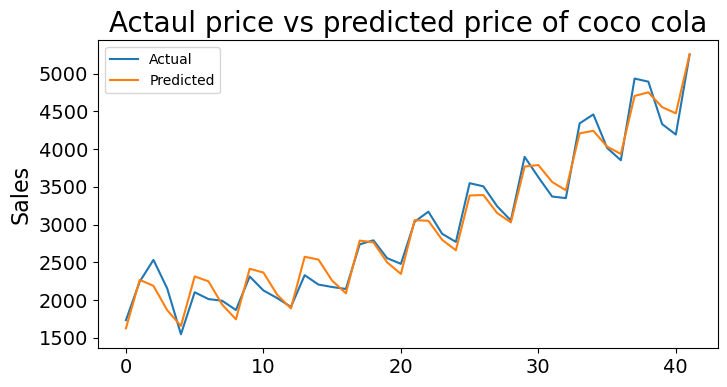

In [65]:
pred_df = pd.DataFrame({'Actual':data1.Sales, 'Predicted':pred_final})

#plotting actual vs forecasted
plt.figure(figsize=(8,4))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title('Actaul price vs predicted price of coco cola', fontsize=20)
plt.ylabel('Sales', fontsize=16)
plt.plot(data1['Sales'],label='Actual')
plt.plot(pred_df['Predicted'],label='Predicted')
plt.legend();